# Introduction

Employee attrition is very important. New employees can spend time and money which could be reallocated by the company. Therefore, understanding why employees leave is very important for businesses to maximize efficiency and reduce training cost which translates into greater profit.

**Through this analysis, we would like to come up with the best possible classifications which could be used to predict if a certain employee is going to leave.**

## Getting the data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

"""
Checking for Missing Values in dataset
"""
missing_values = ["n/a", "na", " ", "NaN"]
df = pd.read_csv("../Input/HR_comma_sep.csv", na_values = missing_values)
d = np.where(df.isnull().sum(axis=1)>2)
df= df.drop(df.index[d])
print(round(100*(1-df.count()/len(df)),2))

print("---------------------SKEWNESS--------------------")
print(df.skew())
print("---------------------KURTOSIS--------------------")
print(df.kurtosis())

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
sales                    0.0
salary                   0.0
dtype: float64
---------------------SKEWNESS--------------------
satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
dtype: float64
---------------------KURTOSIS--------------------
satisfaction_level       -0.670859
last_evaluation          -1.239040
number_project           -0.495478
average_montly_hours     -1.134982
time_spend_company        4.773211
Work_accident             2.085320
left                     -0.487060
promotion_last_5years    42.054957
dtype: float64


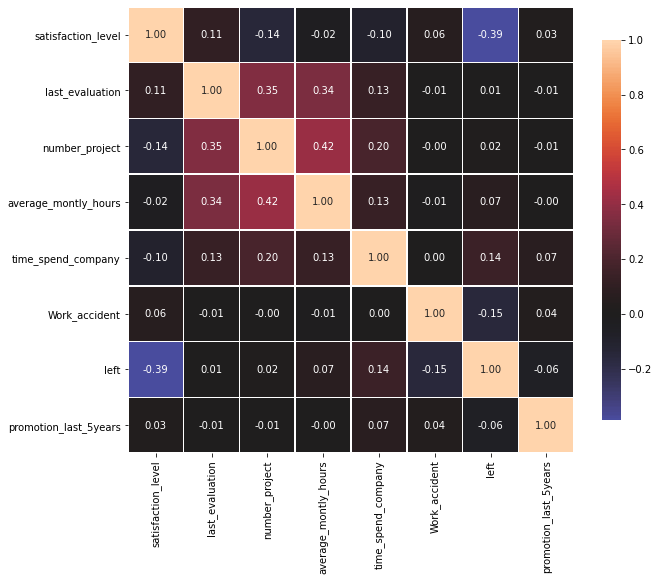

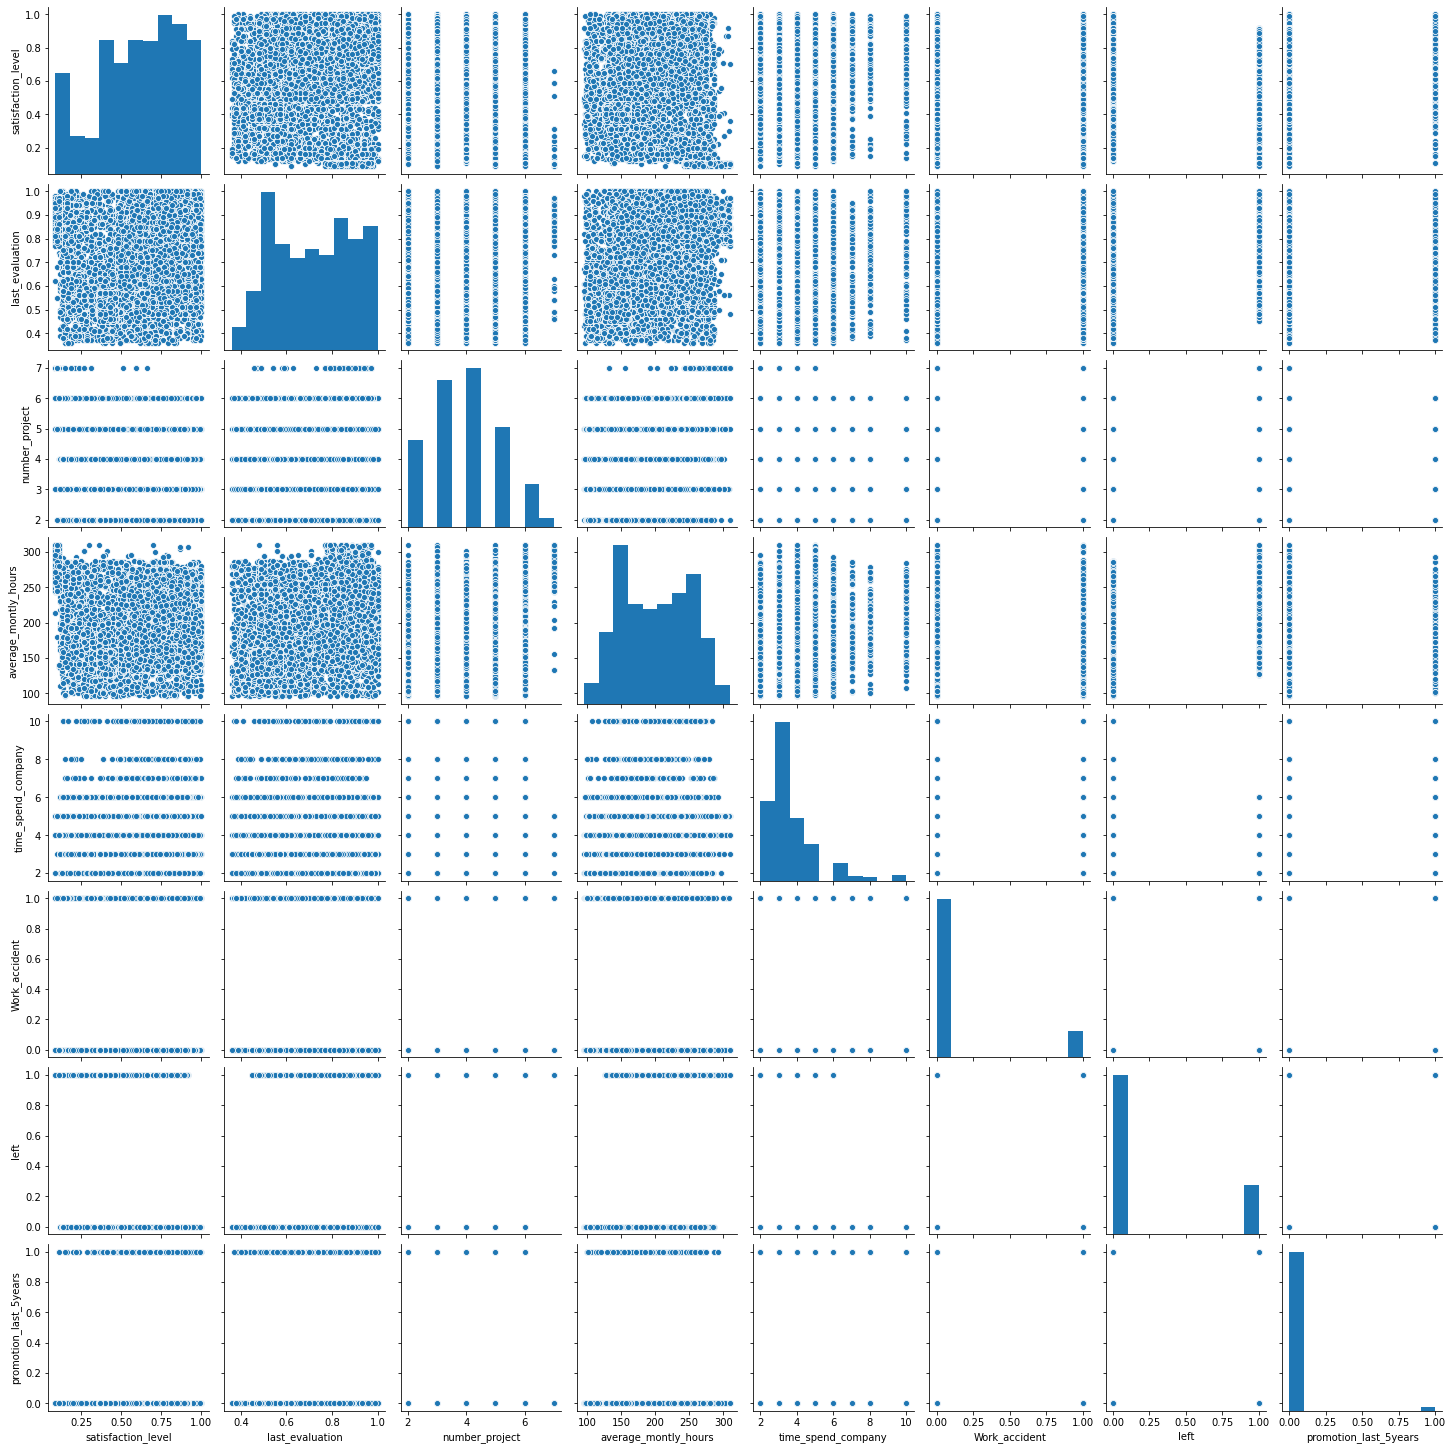

In [3]:
"""
Checking for correlations
"""
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    sns.pairplot(df)
#     plt.show();
    
correlation_heatmap(df)

In [4]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [5]:
df.shape

(14999, 10)

In [6]:
employees_lost = 0
employees_remaining = 0

for val in df['left']:
    if val == 1:
        employees_lost += 1
    else:
        employees_remaining += 1
        
print("Employees Lost -- {}".format(employees_lost))
print("Employees Remaining -- {}".format(employees_remaining))

Employees Lost -- 3571
Employees Remaining -- 11428


<BarContainer object of 2 artists>

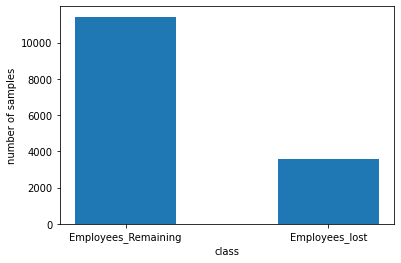

In [7]:
x = ["Employees_Remaining", "Employees_lost"]
y = [employees_remaining, employees_lost]
plt.xlabel("class")
plt.ylabel("number of samples")
plt.bar(x, y, width = 0.5)

## Cleaning Data

In [8]:
#Map salary to 0,1,2
df.salary = df.salary.map({'low':0,'medium':1,'high':2})
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0       0  
1       1  
2       1  
3       0  
4       0

In [9]:
#Generate X and y
X = df.drop(['left','sales'],1)
y = df['left']

# Split into Training and Test Data

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

In [11]:
#splitting the train and test sets
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

## SVM Model Train

In [12]:
from sklearn import preprocessing,neighbors,svm
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
pd.DataFrame(X_train,y_train).head()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0                   0.38             0.53               2   
0                   0.38             0.53               2   
0                   0.38             0.53               2   
0                   0.38             0.53               2   
1                   0.80             0.86               5   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0                      157                   3              0   
0                      157                   3              0   
0                      157                   3              0   
0                      157                   3              0   
1                      262                   6              0   

      promotion_last_5years  salary  
left                                 
0                         0       0  
0                         0       0  
0                         0       0  
0                         0       0  
1                         0       1

In [14]:
accuracy = clf.score(X_test,y_test)

In [15]:
print(accuracy)

0.7843333333333333


In [16]:
pd.DataFrame(clf.predict(X_test),y_test,columns=['ytest']).head()

ytest
left       
0         0
0         0
0         0
1         0
0         0

## Training Multiple Classifiers and Test Them

KNeighborsClassifier
****Results****
Accuracy: 94.7333%
Misclassification Rate: 5.2667%
Recall: 94.3011%
Precision: 91.7138%
F1 Score: 92.9894%
Log Loss: 0.7019444341503495


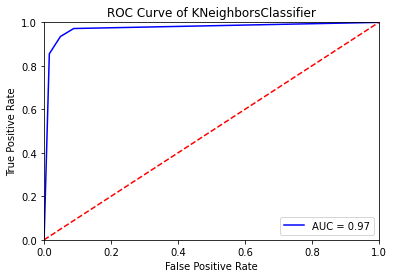

SVC
****Results****
Accuracy: 88.6333%
Misclassification Rate: 11.3667%
Recall: 77.7619%
Precision: 89.6928%
F1 Score: 83.3023%
Log Loss: 0.26972206566045337


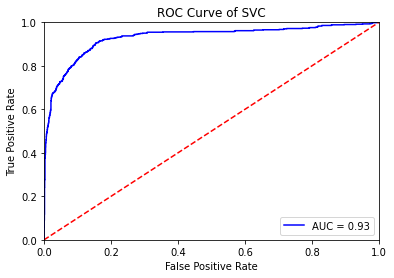

DecisionTreeClassifier
****Results****
Accuracy: 97.6000%
Misclassification Rate: 2.4000%
Recall: 97.2051%
Precision: 96.2218%
F1 Score: 96.7109%
Log Loss: 0.8289306334778572


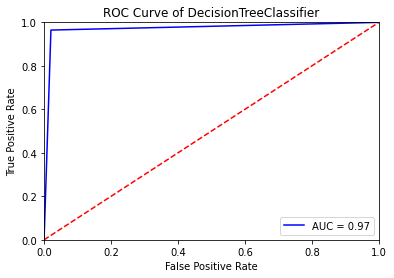

RandomForestClassifier
****Results****
Accuracy: 98.7667%
Misclassification Rate: 1.2333%
Recall: 97.8699%
Precision: 98.6901%
F1 Score: 98.2783%
Log Loss: 0.1327711506115511


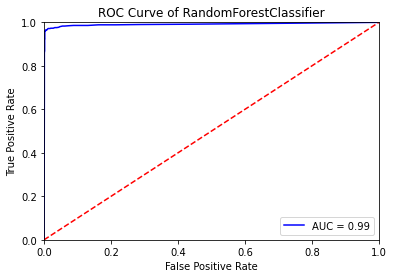

AdaBoostClassifier
****Results****
Accuracy: 95.8667%
Misclassification Rate: 4.1333%
Recall: 94.0616%
Precision: 94.4117%
F1 Score: 94.2363%
Log Loss: 0.5879955467890262


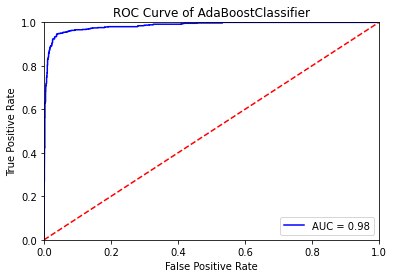

GradientBoostingClassifier
****Results****
Accuracy: 97.4000%
Misclassification Rate: 2.6000%
Recall: 95.6525%
Precision: 97.0631%
F1 Score: 96.3526%
Log Loss: 0.09351240703331173


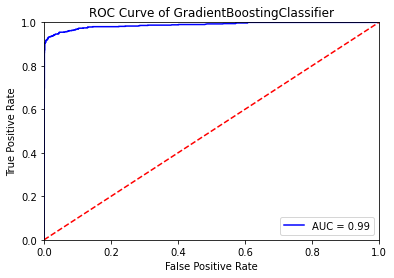

GaussianNB
****Results****
Accuracy: 79.3333%
Misclassification Rate: 20.6667%
Recall: 76.6324%
Precision: 72.4858%
F1 Score: 74.5014%
Log Loss: 0.5363206994800007


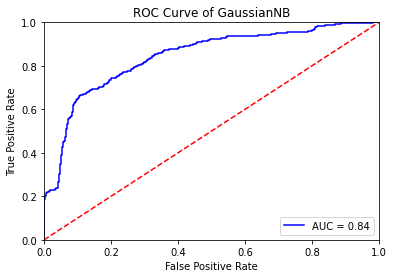

LinearDiscriminantAnalysis
****Results****
Accuracy: 76.7333%
Misclassification Rate: 23.2667%
Recall: 59.7834%
Precision: 65.7731%
F1 Score: 62.6354%
Log Loss: 0.44188459284294723


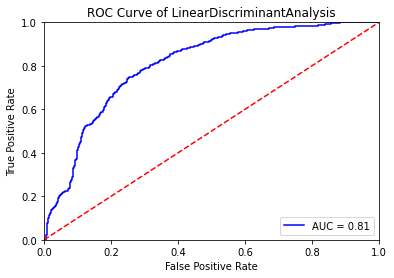

QuadraticDiscriminantAnalysis
****Results****
Accuracy: 91.2667%
Misclassification Rate: 8.7333%
Recall: 89.2398%
Precision: 87.2658%
F1 Score: 88.2418%
Log Loss: 0.39016307430771713


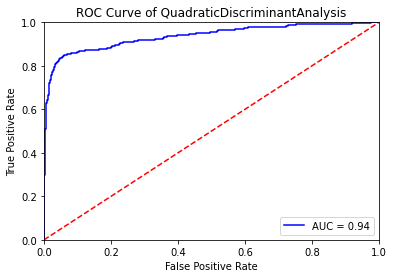

In [17]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score, precision_score, recall_score

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025,gamma=0.1, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
    ]
        
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss", "Recall", "Precision", "Misclassification"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    

    tn, fp, fn, tp = confusion_matrix(y_test, train_predictions).ravel()
    
    recall = recall_score(y_test, train_predictions, average="macro")
    
    precision = precision_score(y_test, train_predictions, average="macro")
    
    f1_score = 2*((recall*precision)/(recall + precision))
    
    print("Accuracy: {:.4%}".format(acc))
    print("Misclassification Rate: {:.4%}".format(1-acc))
    print("Recall: {:.4%}".format(recall))
    print("Precision: {:.4%}".format(precision))
    print("F1 Score: {:.4%}".format(f1_score))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll, recall*100, precision*100, (1 - acc)*100]], columns=log_cols)
    log = log.append(log_entry)
    
    fpr, tpr, threshold = roc_curve(y_test, train_predictions[:, 1])
    roc_auc = auc(fpr, tpr)
    curve_name = 'ROC Curve of ' + name
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(curve_name)
    plt.show()
print("="*30)

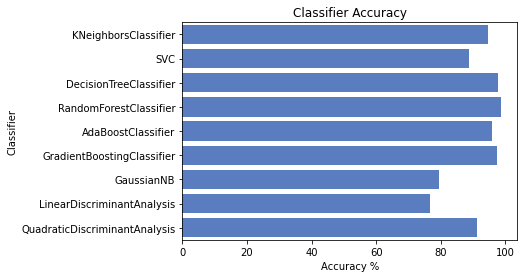

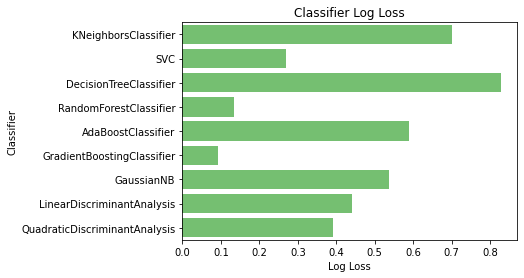

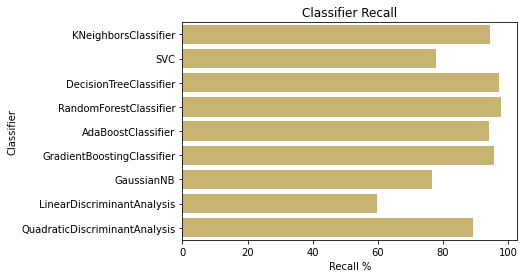

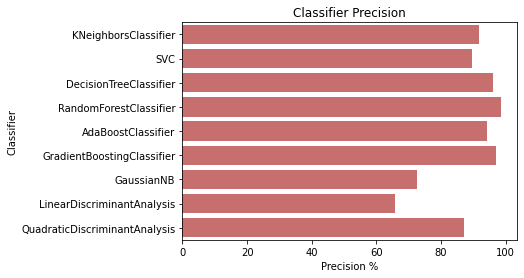

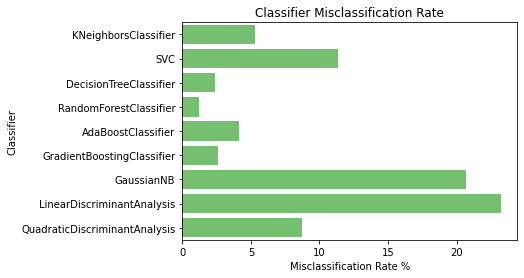

In [18]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=log, color="y")
plt.xlabel('Recall %')
plt.title('Classifier Recall')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=log, color="r")
plt.xlabel('Precision %')
plt.title('Classifier Precision')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Misclassification', y='Classifier', data=log, color="g")
plt.xlabel('Misclassification Rate %')
plt.title('Classifier Misclassification Rate')
plt.show()

In [19]:
# Plotting the Random Forest Classifier tree
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import PIL
import pydotplus
import warnings
from glob import glob
from IPython.display import display, Image
from sklearn.tree import export_graphviz

clf = RandomForestClassifier(n_estimators = 5)
clf = clf.fit(X_train, y_train)

def save_decision_tree_as_png(clf, iteration, feature_name):
    file_name = 'tree_' + str(iteration) + '.png'
    dot_data = export_graphviz(
                clf,
                out_file=None,
                feature_names = feature_name,
                rounded = True,
                proportion = False,
                precision = 2,
                filled = True
                )
    
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(file_name)
    print("Saved -- ", iteration)

In [20]:
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1771385780, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=329678556, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, m

In [21]:
clf.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1771385780, splitter='best')

In [22]:
save_decision_tree_as_png(clf.estimators_[0], 0, X_train.columns)

Saved --  0


In [23]:
images = [ PIL.Image.open(f) for f in glob('./*.png')]

In [24]:
for im in images:
    display(Image(filename=im.filename, retina=False))

**So from here we can tell get the prediction of Decision Tree or RandomForest and use it to predict future data**